In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import RegressionResults


sns.set()

from __future__ import division
import math

In [2]:
df = pd.read_csv('cleaned_vg_df.csv')
df = df.drop('Unnamed: 0', axis=1)

df = df[(df.release_year == df.Year_of_Release_Sales)]

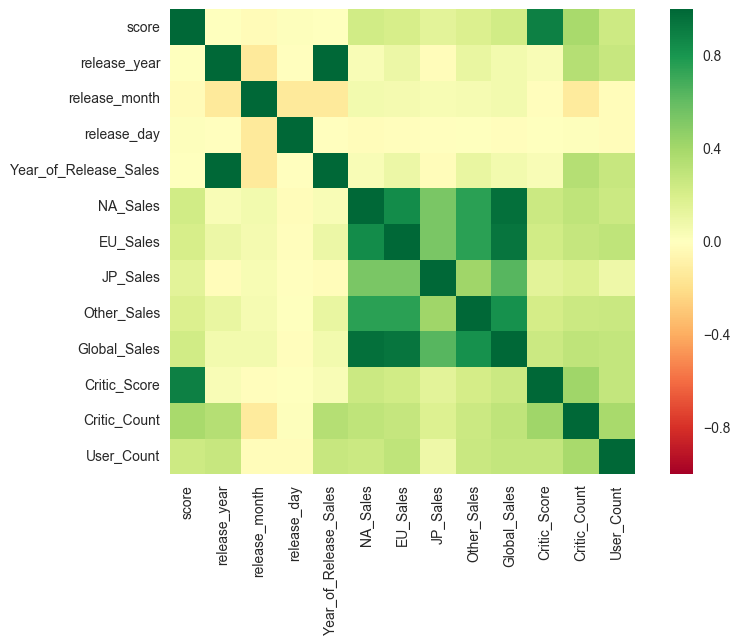

In [161]:
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')


In [3]:
months = df.release_month.value_counts().sort_index()
total = months.sum()

(-1.0007618812905559, 1.0, -1.0180328758478558, 1.0012976843437351)

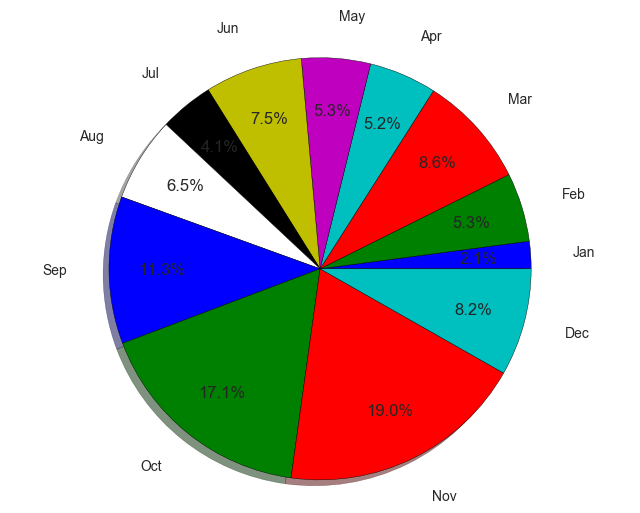

In [4]:
monthly_releases = months / total * 100
labels = ['Jan', 'Feb','Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct','Nov','Dec']
#plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.pie(monthly_releases, labels=labels, autopct='%1.1f%%', shadow=True, labeldistance=1.2, pctdistance=0.75)
plt.axis('equal')

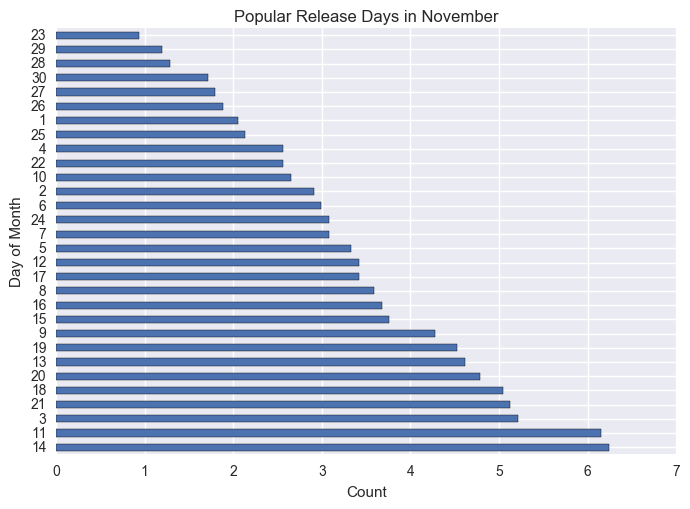

In [5]:
#We know that November is a popular month, but which day of November is the best?

#th 14thm historically had the most releases. 

days = df[(df.release_month==11)]
days = days.release_day.value_counts().sort_index()
day_releases = days / days.sum() * 100
day_releases.sort_values(ascending=False).plot(kind='barh')
plt.title('Popular Release Days in November')
plt.xlabel('Count')
plt.ylabel('Day of Month')

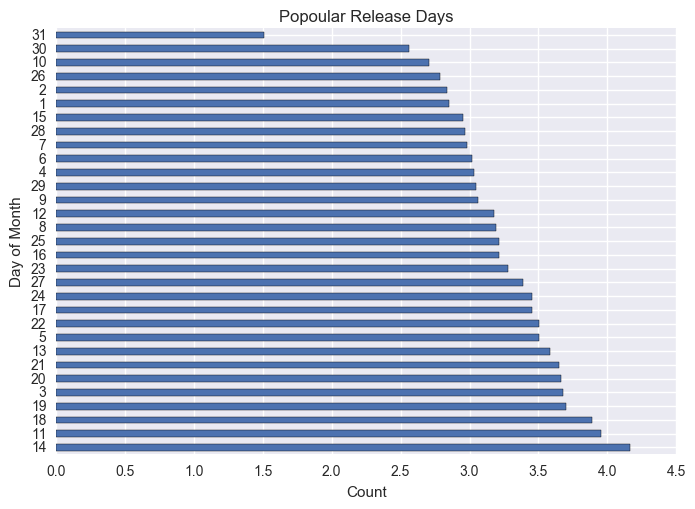

In [6]:

days = df.release_day.value_counts().sort_index()
day_releases = days / days.sum() * 100
day_releases.sort_values(ascending=False).plot(kind='barh')
plt.title('Popoular Release Days')
plt.xlabel('Count')
plt.ylabel('Day of Month')

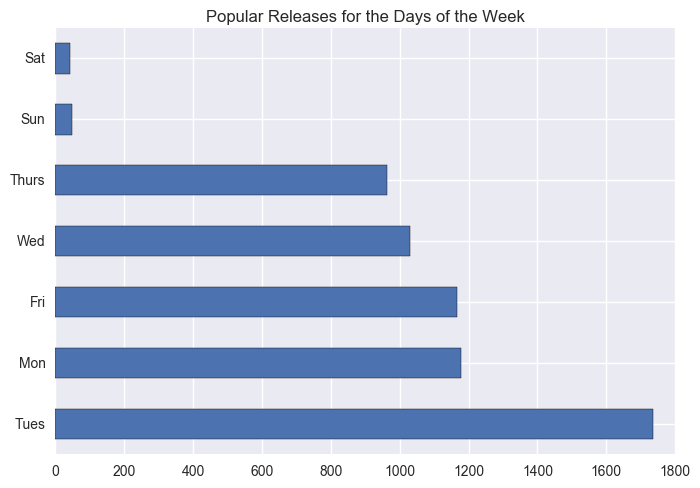

In [7]:
import datetime as dt
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
dayofw =  df['Release_Date'].dt.dayofweek.value_counts().sort_values(ascending=False)

days = {0: 'Mon',
       1:'Tues',
       2:'Wed',
       3:'Thurs',
       4:'Fri',
       5:'Sat',
       6:'Sun'}

dayofw.rename(days).plot(kind='barh')
plt.title('Popular Releases for the Days of the Week')

## What is considered a good critic score in terms of sales?

Metacritic scores affect how developers get bonuses and how well their game will do. 

-How good have your games been

-Average score for developer 

-If you get above 90 metascore. Is this true that you will do well?

-Is a score of 90 really the score that developers should be aiming for when doing well for a video game


Metacritic scores have been widely criticized for how much they influence how well a video game will do. Often, publishers will used a developer's previous metacritic score as a measure for receiving funding or not. Developers will often pitch to publishers favorable components of their video game in order to generate the highest review and potential funding. According to the metacritic site, any score above 90 is universally acclaimed. But is 90 truly the threshold for what developers should be aiming for. In order to investigate this "threshold" for success, the dataset consisting of Critic Scores and Global Sales was divided into two subgroups using the outliers of global sales as a metric: dataset without outliers and a dataset with just outliers. Global Sales data that is more than 3 standard deviations away are considered an outlier and will be considered widely successful. 


The dataset without global sales outliers was used to investigate what the average critic score is for a typical game release that isn't considered extremely successful. According to Metacritic, a score in a range of 54-74 is considered average and a score in a range of 75-89 is considered genereally favorable. A typical game has a 70.2889 metacritic score, at 95% CI the average score can be as low as 69.9002 and as high as 70.6777. 


Developers often aim to have a video game that will have a 90 metacritic score or above in order to achieve success and funding their game. Any game with a score above 90 is universally acclaimed and 75-89 is considered generally favorable. In order to test whether 90 is truly an threshold for success, a One-Sample T-test is used to determine the validity of this high achieving score and what is a more realistic score that developers should strive for. The latter dataset with the outliers is used where data containing global sales and its respected critic score with more than 3 standard deviations away from the mean is used and this is metric used as a measure for success. Under the null hypothesis, a successful metacritic score is 90 and the alernative is that the successful metacritic score is not 90. 

$H_{o}$ : $\bar{x}$ = 90

$H_{A}$ : $\bar{x}$ $\ne$ 90


t= -2.811

p-value = 0.0065



With a p-value from the t-test being less than 0.05, there is reason to reject the null hypothesis such that a successful metacritic score is not 90 and the observed from the data is actually -2.811 below 90. A sample mean of 86.7031 was calculated with a 95 % CI range of 84.377 and 89.028. This means that developers shouldn't stress so hard in achieving a metacritic of 90 or above when the average metacritic score of widely successful games (by their sales) is 86.7031. And is still considered successful with a score as low as 84 and as high as 89. This just goes to show that the metacritic score range is more skewked than what they actually are. 



source: https://web.archive.org/web/20150928225241/http://www.metacritic.com/about-metascores

https://kotaku.com/metacritic-matters-how-review-scores-hurt-video-games-472462218

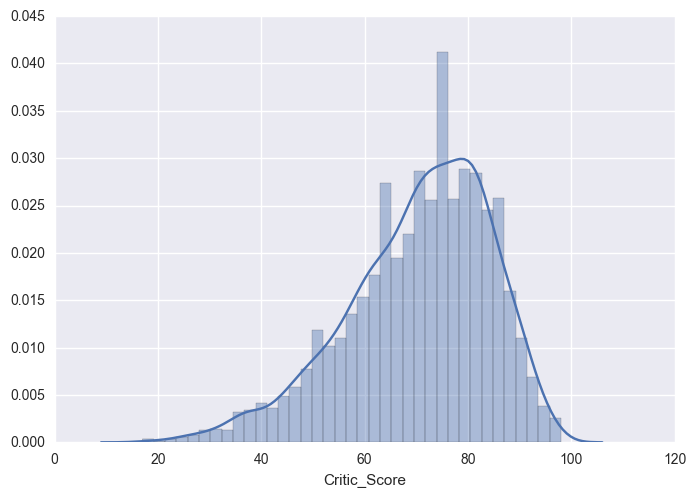

In [8]:
critic_score = df['Critic_Score'].dropna()
sns.distplot(critic_score)

((array([-3.64109154, -3.40609954, -3.27660039, ...,  3.27660039,
          3.40609954,  3.64109154]),
  array([ 17.,  19.,  19., ...,  98.,  98.,  98.])),
 (13.664238633909356, 70.49471210340775, 0.98335343287976928))

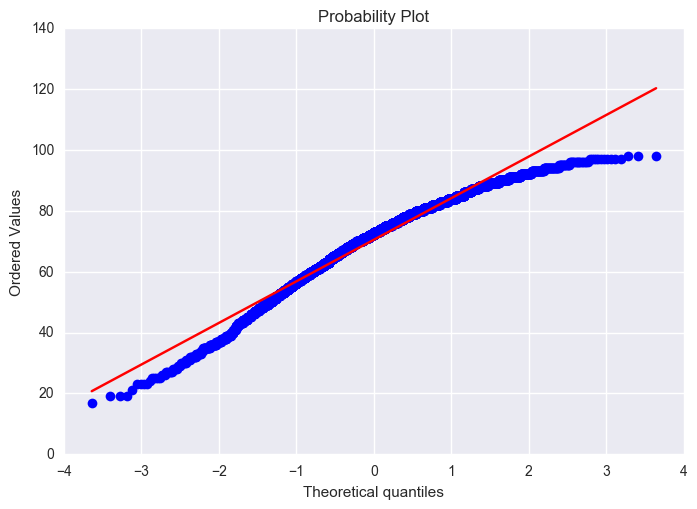

In [9]:
stats.probplot(critic_score, plot=plt)

In [10]:
critic = df[['Critic_Score', 'Global_Sales']]

In [11]:
def conf_int (data):
    #calculates confidence interval with a simple t-test
    alpha=0.05
    ntails = 2
    dof = len(data)-1
    mean = np.mean(data)
    SEM = np.std(data)/ np.sqrt(len(data))
    
    tcrit = abs(stats.t.ppf(alpha/ntails, dof))
    
    #95 CI
    low_tail = mean - tcrit * SEM
    high_tail = mean + tcrit * SEM
    return low_tail, high_tail

In [12]:
#Global Sales and Critical Scores without NaNs and removed the outliers
crit_score = critic [np.abs(critic.Global_Sales - np.mean(critic.Global_Sales)) <=(3*critic.Global_Sales.std())]
crit_score.Critic_Score.mean()

70.26449563145353

In [13]:
conf_int(crit_score.Critic_Score)

(69.9177491649491, 70.611242097957955)

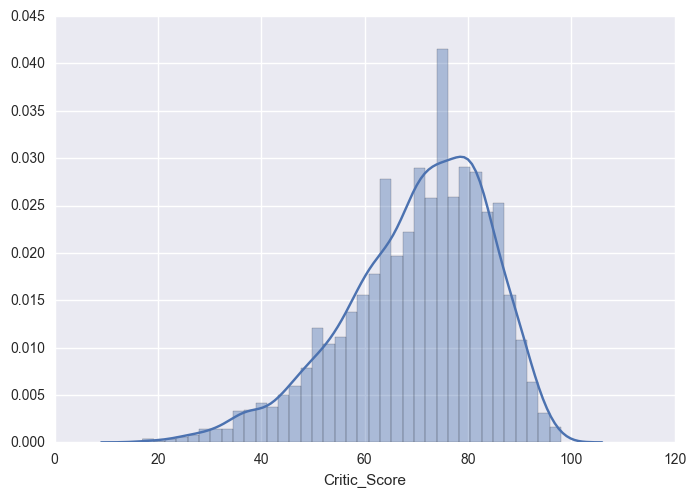

In [14]:
sns.distplot(crit_score.Critic_Score.dropna())

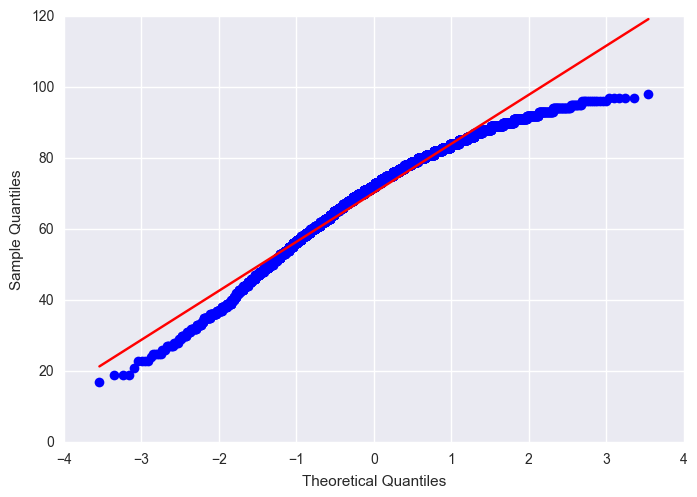

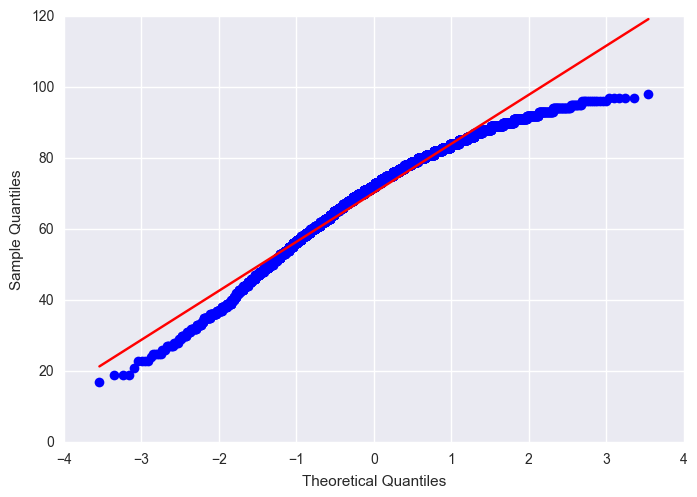

In [15]:
sm.qqplot(crit_score.Critic_Score.dropna(), line='s')

## Calculating with only outliers

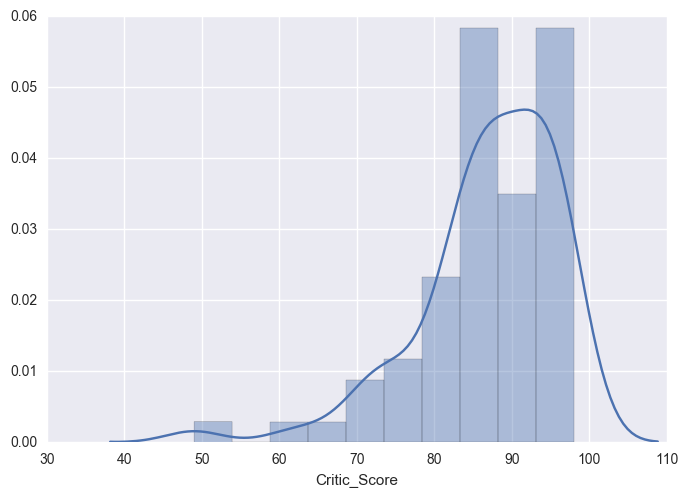

In [16]:
#outliers

#critic scores with outliers
crit_out = critic [np.abs(critic.Global_Sales - np.mean(critic.Global_Sales)) >(3*critic.Global_Sales.std())]

crit_out = crit_out.dropna()

sns.distplot(crit_out.Critic_Score)

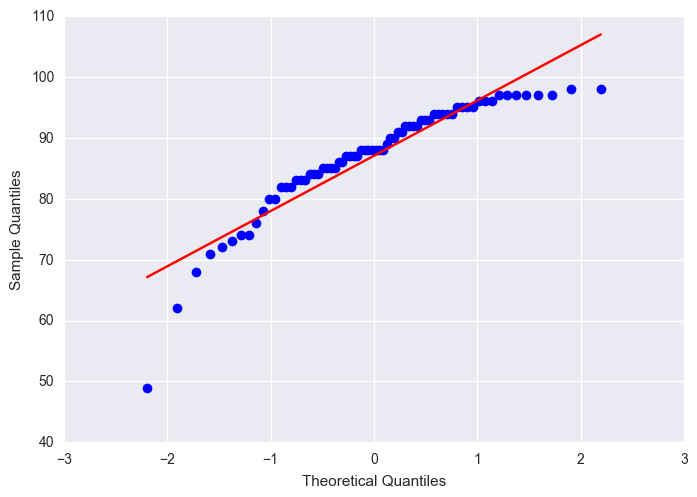

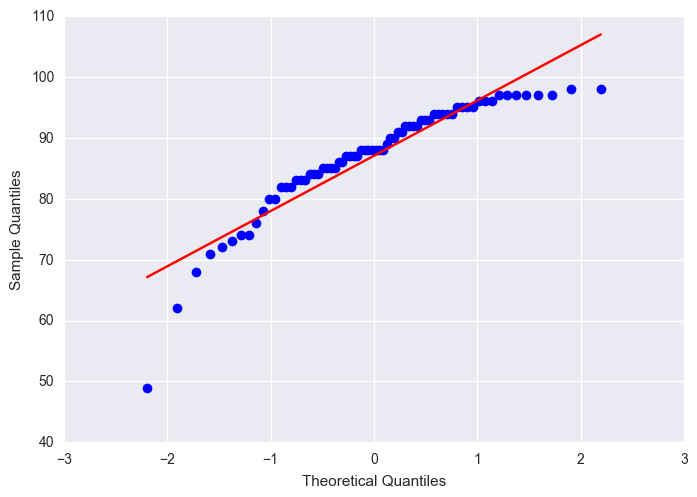

In [17]:
sm.qqplot(crit_out.Critic_Score, line='s')

In [18]:
stats.ttest_1samp(crit_out.Critic_Score, 90)

Ttest_1sampResult(statistic=-2.6930147062304246, pvalue=0.0088810753873270303)

In [19]:
np.percentile(crit_out.Critic_Score, [2.5,97.5]) #any score outside of this is considered not good. 

array([ 66.35 ,  97.275])

In [20]:
conf_int(crit_out.Critic_Score)


(84.892745486055162, 89.221540228230566)

In [21]:
samp_mean = np.mean(crit_out.Critic_Score)
samp_mean

87.05714285714286

## Console Wars: Xbox 360 vs. PlayStation 3


In the Gaming Community, there has been a long debate between which console is better: Xbox or Playstation. But this heated debate did not start until the releases of the Xbox 360 and PlayStation 3 that truly made each respected console as rivals. Personally, as a Xbox fan, I would like to assume that Xbox 360 is more favored than the PlayStation 3. A Two Sample T-test is used to test whether there is statistical significance in the difference in means between the two console's average critic score. 

$\bar{x}_{1}$ = Xbox 360 Critic Score

$\bar{x}_{2}$ = PlayStation 3 Critic Score

$H_{o}$ : $\bar{x}_{1}$ - $\bar{x}_{2}$  = 0 or $\bar{x}_{1}$ = $\bar{x}_{2}$

$H_{A}$ : $\bar{x}_{1}$ - $\bar{x}_{2}$ $>$ 0 or $\bar{x}_{1}$ $>$ $\bar{x}_{2}$


#### Conclusion:
To my surprise, the PlayStation 3's average critic score is higher than the Xbox 360. The average critic score for the PlayStation 3 is 72.486 (as low as 71.328 and as high as 73.644). In comparison to the Xbox 360's average critic score of 70.810 (69.681, 71.938), the PlayStation 3's average critic score is higher by 1.676. An t-statistic of -2.034 shows that the difference in means is -2 standard deviations away from what the null hypothesis expected, which in this case is 0. This just goes to show that the two platform's average critic score are not the same. With the pvalue 0.0421 being less than 0.05, there is evidence to reject the Null the Hypothesis and there is statistical significance between the average critic score. So sadly to conclude, the PlayStation 3 does outperform the Xbox 360 in Critic Ratings. 

In [22]:
xbox = df[(df.Platform=='Xbox 360')]['Critic_Score'].dropna()
ps3 = df[(df.Platform=='PlayStation 3')]['Critic_Score'].dropna()

In [23]:
print('Xbox 360 mean: {}'.format(xbox.mean()))
print('ps3 mean: {}'.format(ps3.mean()))

Xbox 360 mean: 70.8103975535
ps3 mean: 72.4865831843


In [24]:
#xbox
conf_int(xbox)

(69.681984884036623, 71.93881022299702)

In [25]:
#ps3
conf_int(ps3)

(71.328388741878683, 73.644777626636511)

In [26]:
stats.ttest_ind(xbox, ps3, equal_var=False)

Ttest_indResult(statistic=-2.034097128706716, pvalue=0.042161759812732971)

## Which genre is more favorable in editor's choice ?

Do editor's favor certain genres more so than others? And is there an association between the genre and the editor's choice. 

$H_{o}$ : There is no association between a genre and the editor's choice

$H_{A}$ : There is an association between a genre and the editor's choice


**Conclusion**: There is an association between the two variables such that an editor's choice have preferences over other genres. 

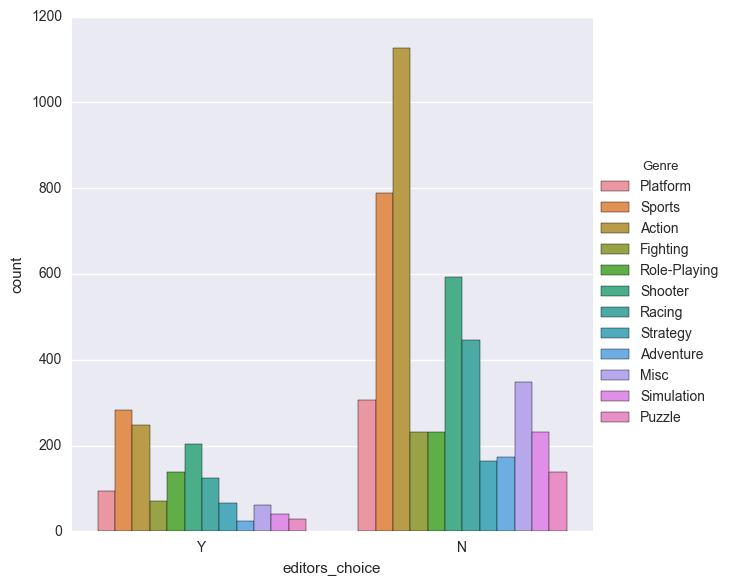

In [27]:
sns.factorplot(x='editors_choice', hue='Genre', data=df, kind='count', size=6)

In [28]:
pd.crosstab(index=df.editors_choice, columns=df.Genre, margins=True)


Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
editors_choice,,,,,,,,,,,,,
N,1128,173,232,349,307,138,445,232,593,231,790,164,4782
Y,248,24,70,62,93,28,125,139,204,40,284,67,1384
All,1376,197,302,411,400,166,570,371,797,271,1074,231,6166


In [29]:
cont_table = pd.crosstab(index=df.editors_choice, columns=df.Genre)
cont_table

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
editors_choice,,,,,,,,,,,,
N,1128,173,232,349,307,138,445,232,593,231,790,164
Y,248,24,70,62,93,28,125,139,204,40,284,67


In [30]:
chi2, p, dof, ex = stats.chi2_contingency(cont_table)
chi2, p, dof

(120.85953200304908, 1.217488237505159e-20, 11)

In [31]:
#average critic score across all genres and whether it's an editor's choice or not 
edit_genre_score = pd.crosstab(index=df.editors_choice, columns=df.Genre, values=df.Critic_Score, aggfunc=np.mean)
edit_genre_score

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
editors_choice,,,,,,,,,,,,
N,63.876955,62.246154,64.846995,63.699187,65.081545,64.744444,64.560510,68.811927,65.934615,67.772727,68.924071,69.181159
Y,84.940928,84.400000,81.920635,83.480000,84.545455,81.192308,84.008772,86.137405,85.370558,82.189189,85.229323,83.935484


## How are the average critic scores across genres?

Using the F-Statistic/ANOVA to test if the average critic score across all the genres have statistical significance and to see which genre does the best in terms of the average critic score. 

If the following conditions are met then the ANOVA Test can be used to analyze the average critic score across all the platforms:
1. The sample is Random and the measurements are Independent
2. The groups are independent of each other.
3. The standard deviation among the groups are the same (The largest standard deviation is no more than 2 times the smallest)
4. Each group is Normally Distributed Or the Sample Size is at least 25 in each group.


$H_{o}$ : The average critic score across all genres are the same. 

$H_{A}$ : The average critic score across all genres are varied. 

Because a comparison between and within groups is being observed, the Bonferonni Correction is required for the significance level. $\alpha$/K will be used as the significance level where $\alpha$=0.00090. An F-statistic is used to quantify the variation betweeen groups to the variation within groups. An F-Statistic of 1.1226 was computed. The small F-statistic value shows that the variation between groups relative to the variation within groups is small. Since the p-value is 0.340 is larger than 0.00090, the null hypothesis is not rejected and conclude that the average critic score across the genres are the same and not statistically siginificant in this analysis. 

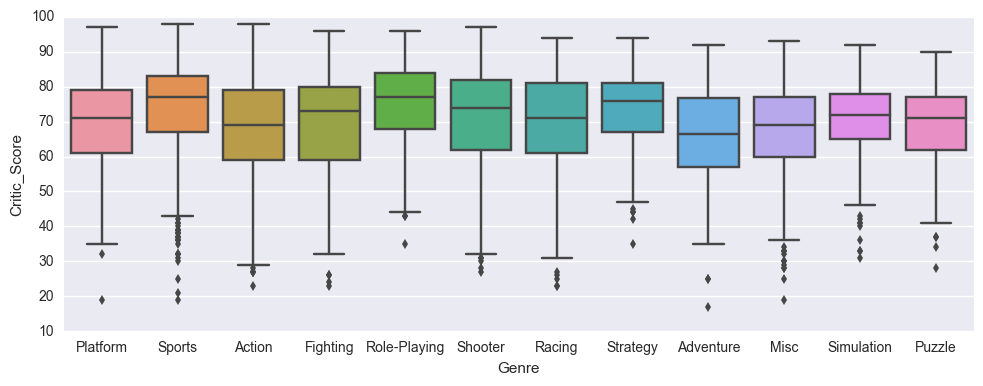

In [32]:

sns.factorplot(data=df, y='Critic_Score', x='Genre', kind='box', aspect=2.5, size=4)


In [33]:
df.groupby(['Genre'])['Critic_Score'].std().sort_values(ascending=False)

Genre
Adventure       14.886145
Fighting        14.677227
Shooter         14.445180
Misc            14.311251
Action          14.234024
Racing          13.947057
Sports          13.078075
Platform        12.960959
Puzzle          12.940146
Role-Playing    11.909299
Simulation      11.683050
Strategy        11.549108
Name: Critic_Score, dtype: float64

In [34]:
df.groupby(['Genre'])['Critic_Score'].mean().sort_values(ascending=False)

Genre
Role-Playing    75.315186
Sports          73.824859
Strategy        73.755000
Shooter         71.274756
Simulation      70.276995
Platform        69.916129
Racing          69.740654
Fighting        69.219512
Puzzle          68.431034
Action          68.051003
Misc            67.040541
Adventure       65.200000
Name: Critic_Score, dtype: float64

In [35]:
crit_count = df[(df.Critic_Score.notnull()==True)]
cc = crit_count.groupby(['Genre'])['Critic_Score'].unique()
cc

Genre
Action          [90.0, 79.0, 77.0, 81.0, 57.0, 76.0, 86.0, 88....
Adventure       [88.0, 76.0, 75.0, 51.0, 78.0, 49.0, 84.0, 72....
Fighting        [82.0, 83.0, 74.0, 76.0, 89.0, 84.0, 96.0, 75....
Misc            [86.0, 60.0, 77.0, 66.0, 52.0, 68.0, 79.0, 70....
Platform        [88.0, 84.0, 85.0, 93.0, 90.0, 69.0, 54.0, 91....
Puzzle          [75.0, 88.0, 79.0, 68.0, 65.0, 87.0, 77.0, 44....
Racing          [85.0, 80.0, 81.0, 84.0, 64.0, 61.0, 93.0, 88....
Role-Playing    [68.0, 82.0, 55.0, 61.0, 66.0, 75.0, 92.0, 81....
Shooter         [74.0, 67.0, 89.0, 91.0, 87.0, 83.0, 81.0, 88....
Simulation      [73.0, 75.0, 65.0, 83.0, 91.0, 86.0, 92.0, 76....
Sports          [83.0, 84.0, 88.0, 63.0, 81.0, 90.0, 82.0, 80....
Strategy        [90.0, 89.0, 92.0, 62.0, 75.0, 82.0, 71.0, 74....
Name: Critic_Score, dtype: object

In [36]:
stats.f_oneway(cc.Action, cc.Adventure, cc.Fighting, cc.Misc, cc.Platform, cc.Puzzle, cc.Racing, cc['Role-Playing'],
              cc.Shooter, cc.Simulation, cc.Sports, cc.Strategy)

F_onewayResult(statistic=1.2225083744201146, pvalue=0.26771113709398853)

## Is there an Relationship between critic scores and global sales?



In order to investigate if there is an correlation between critic score and global sales, a linear regression model is used where the critic score is the explanatory variable and global sales is the response variable.

$H_{o}$ : There is no association between Critic Score and Global Sales

$H_{A}$ : There is an association between Critic Score and Global Sales


With a p-value of 1.7e-75< 0.05, there is a statistical significance in the correlation coefficient r. An r value of 0.064 indicates that there is a small positive correlation between the critic score and global sales. An $R^2$ value of 0.064 indicates that only 6.4% global sale values can be explained by the critic score. A slope of 0.037 was calculated and at 95% CI can be as low as 0.034 and as high as 0.042. For every critic score that increases by one point, the dollar amount for global sales on average can increase by $0.0379. 


This regression model can be improved by removing the outliers and the high leverage points. However, the QQplot looks worse than the original and the residuals doesn't seem to be normal. Despite non-normal residuals, the model did improve with an $R^2$ = 0.101 and an F statistic of 572.0. Because of the non-normal residuals, a log transformation of the global sales was used to fit the regression model. Upon using the transformation, the residuals fit the QQplot line very well. Not only were the residuals normalized, but the model improved significantly. The original model had an $R^2$= 0.064, which meant that only 6.4% of the critic scores can be used to predict the global sales of that particular game. In the model where the high leverage points and outliers were removed, and a log transformation was performed, an $R^2$=0.164 was computed. The model improved significantly from 6.4% to 16.4% of the critic score's can be used to predict the game's global sales. 

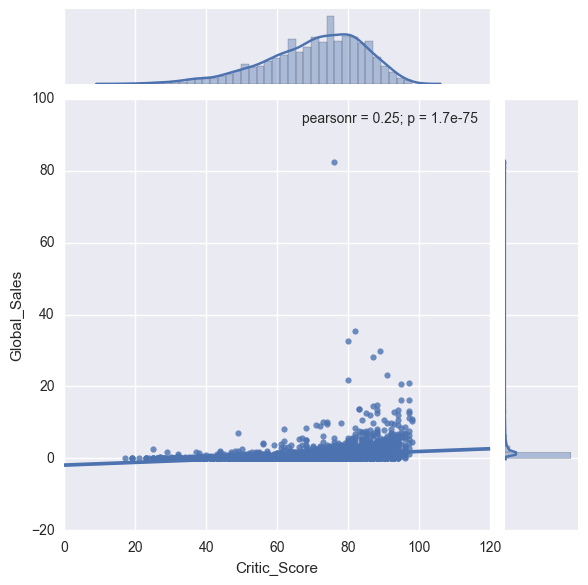

In [143]:
scores = df[['Critic_Score','Global_Sales']].dropna()

sns.jointplot(x='Critic_Score',y='Global_Sales', data=scores, kind='reg')

20

In [42]:
mod = ols(formula='Global_Sales ~ Critic_Score', data=scores)
res_model = mod.fit()
print(res_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     349.5
Date:                Thu, 21 Dec 2017   Prob (F-statistic):           1.74e-75
Time:                        13:46:08   Log-Likelihood:                -10818.
No. Observations:                5106   AIC:                         2.164e+04
Df Residuals:                    5104   BIC:                         2.165e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -1.8613      0.146    -12.766   

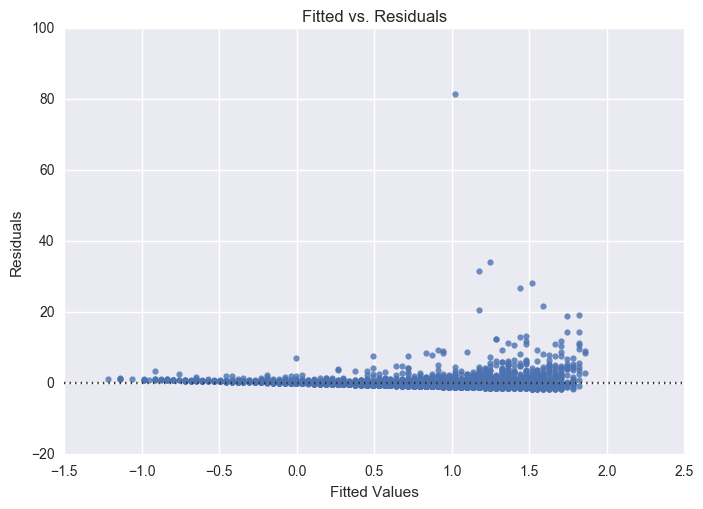

In [46]:
sns.residplot(x=res_model.fittedvalues, y=res_model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted vs. Residuals')

((array([-3.64109154, -3.40609954, -3.27660039, ...,  3.27660039,
          3.40609954,  3.64109154]),
  array([ -1.66452416,  -1.65659002,  -1.64659002, ...,  31.59655389,
          34.27068559,  81.50829047])),
 (1.1887145559527468, -4.8261211109013495e-15, 0.59010372321231752))

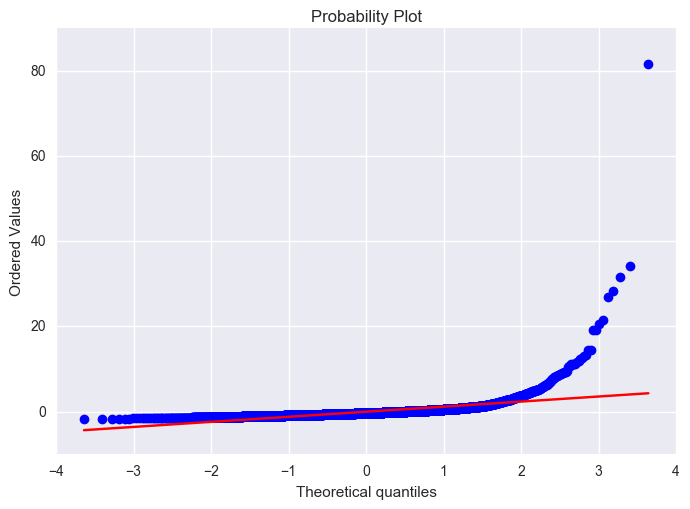

In [47]:
stats.probplot(res_model.resid, plot=plt)


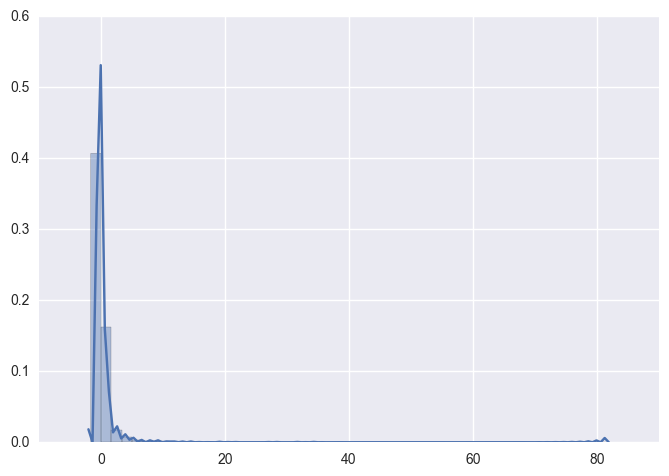

In [48]:
sns.distplot(res_model.resid, norm_hist=True)

In [49]:
from statsmodels.graphics.regressionplots import *


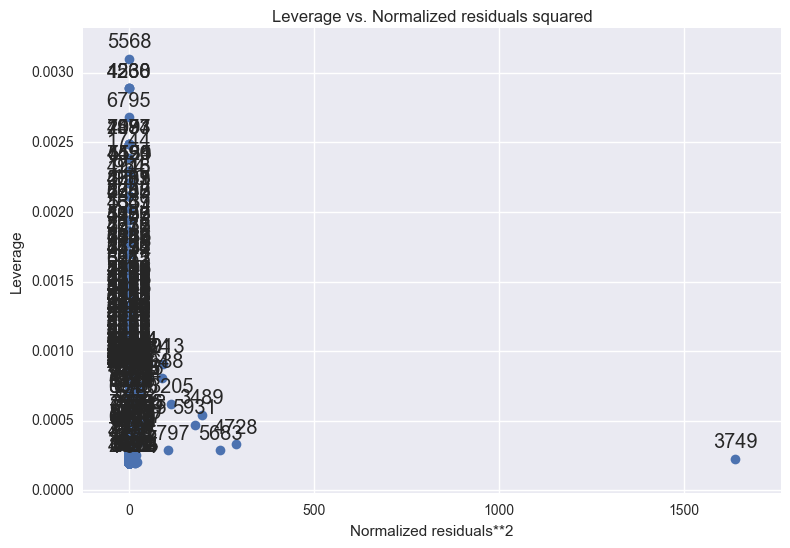

In [72]:
fig, ax = plt.subplots(figsize=(9,6))
fig = plot_leverage_resid2(res_model, alpha=0.05, ax=ax)

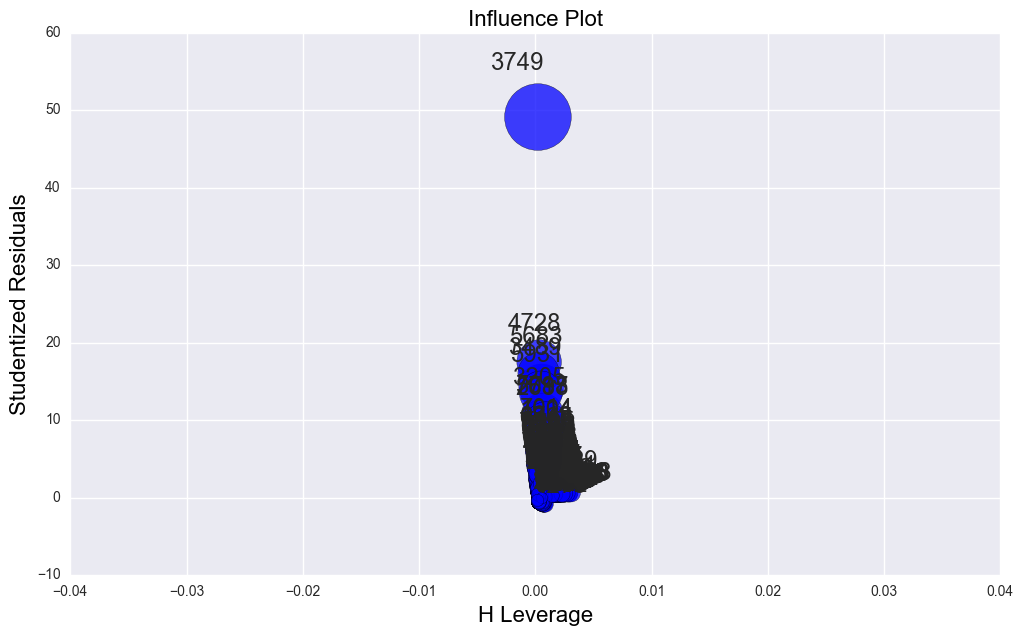

In [52]:

fig1, ax1 = plt.subplots(figsize=(12,7))

fig1 = sm.graphics.influence_plot(res_model, criterion="cooks",ax= ax1)

In [144]:
outliers = res_model.resid > 30
out = scores [outliers]
out.index

Int64Index([3749, 4728, 5683], dtype='int64')

In [145]:
clean = scores.drop(out.index)

len(clean)

5103

In [114]:
no_outliers_model = ols ('Global_Sales~Critic_Score', data=clean).fit()
print(no_outliers_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     572.0
Date:                Thu, 21 Dec 2017   Prob (F-statistic):          6.71e-120
Time:                        14:02:59   Log-Likelihood:                -9394.9
No. Observations:                5103   AIC:                         1.879e+04
Df Residuals:                    5101   BIC:                         1.881e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -1.8082      0.110    -16.369   

((array([-3.64094026, -3.4059391 , -3.27643444, ...,  3.27643444,
          3.4059391 ,  3.64094026]),
  array([ -1.60831764,  -1.6015458 ,  -1.5915458 , ...,  21.67199789,
          26.92908525,  28.33554157])),
 (1.0947594885782552, -8.6346915269959725e-16, 0.71732313172997819))

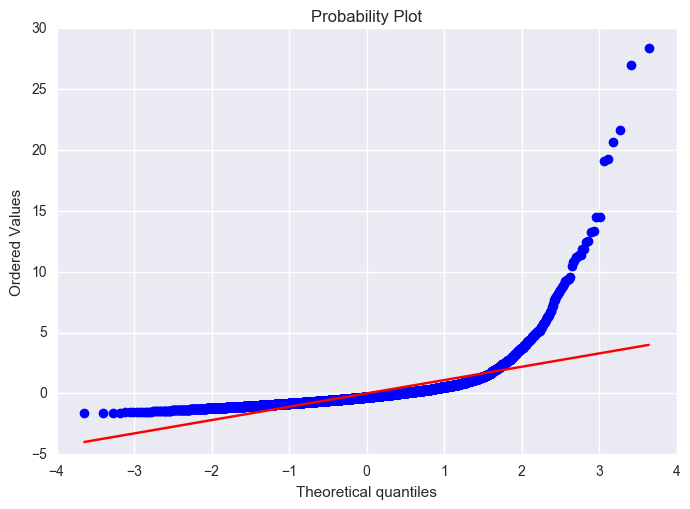

In [121]:
stats.probplot(no_outliers_model.resid, plot=plt)


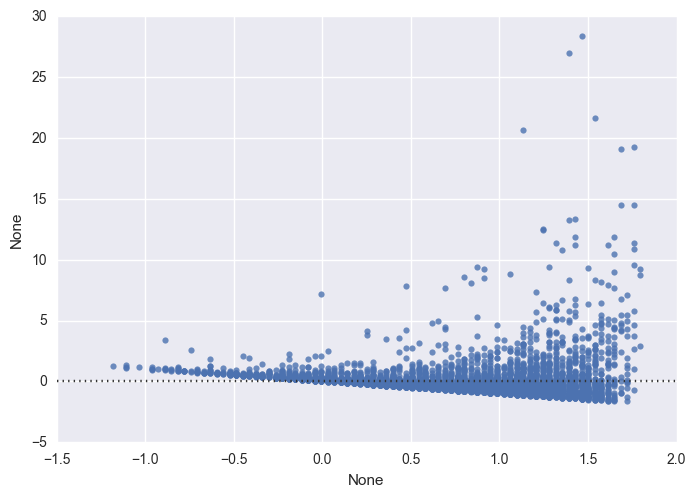

In [120]:
sns.residplot(x=no_outliers_model.fittedvalues, y=no_outliers_model.resid)

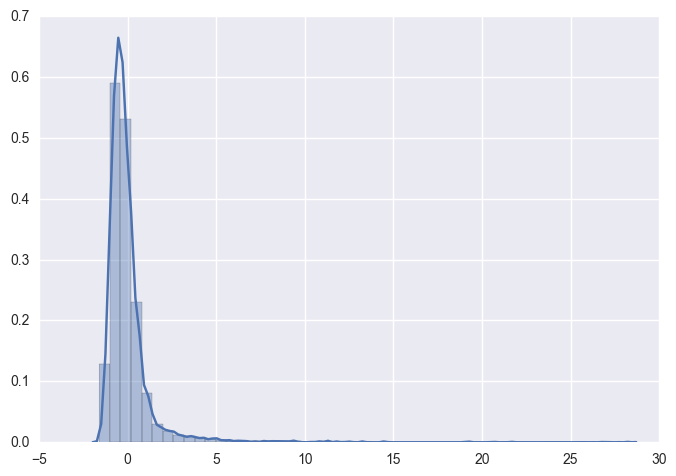

In [119]:
sns.distplot(no_outliers_model.resid, norm_hist=True)

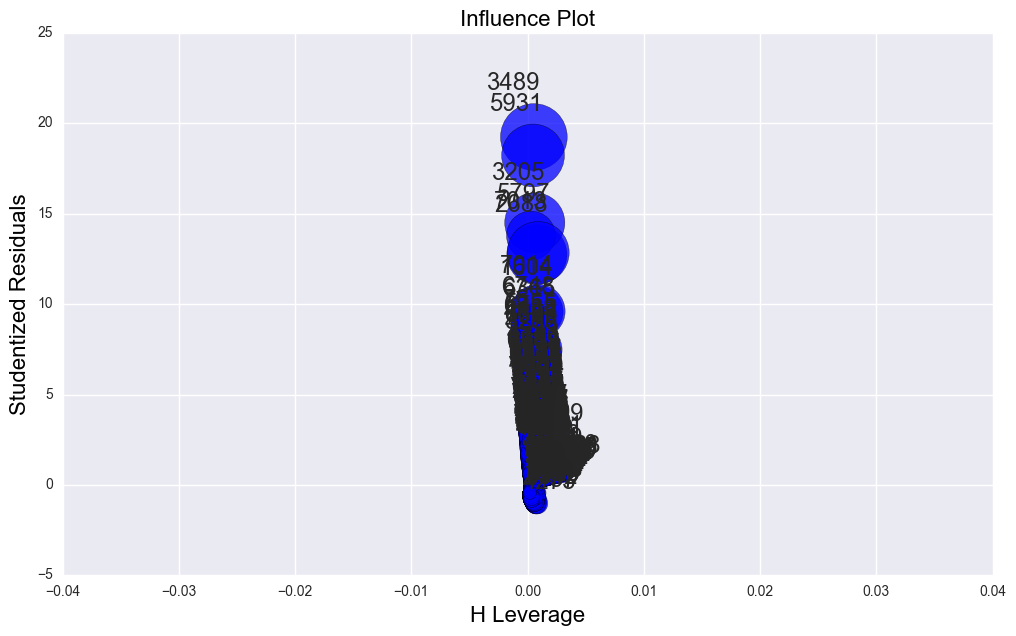

In [123]:

fig1, ax1 = plt.subplots(figsize=(12,7))

fig1 = sm.graphics.influence_plot(no_outliers_model, criterion="cooks",ax= ax1)

In [149]:
clean['Global_Sales'] = np.log(clean.Global_Sales * (10**6))

In [151]:
cc = ols('Global_Sales ~ Critic_Score', data=clean).fit()
print(cc.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     999.6
Date:                Thu, 21 Dec 2017   Prob (F-statistic):          1.66e-200
Time:                        14:23:39   Log-Likelihood:                -8505.1
No. Observations:                5103   AIC:                         1.701e+04
Df Residuals:                    5101   BIC:                         1.703e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        9.7340      0.093    104.904   

((array([-3.64094026, -3.4059391 , -3.27643444, ...,  3.27643444,
          3.4059391 ,  3.64094026]),
  array([-4.32126071, -4.23959261, -4.23959261, ...,  3.89620327,
          3.96888341,  4.05468868])),
 (1.2782232803148987, 5.5645777986460818e-15, 0.99707109783778669))

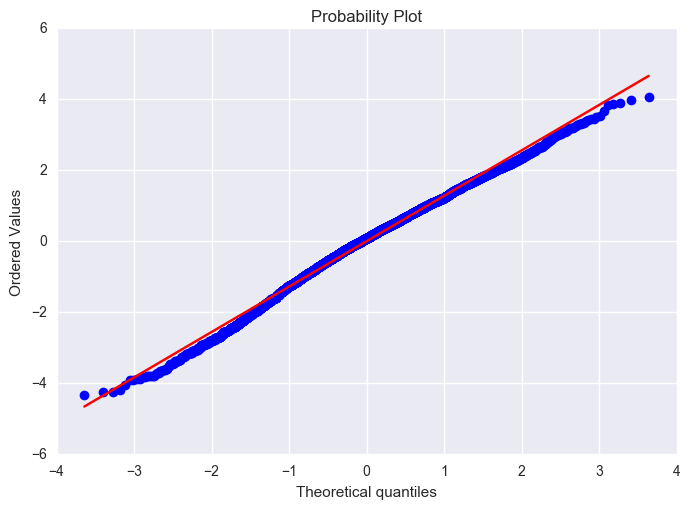

In [152]:
stats.probplot(cc.resid, plot=plt)

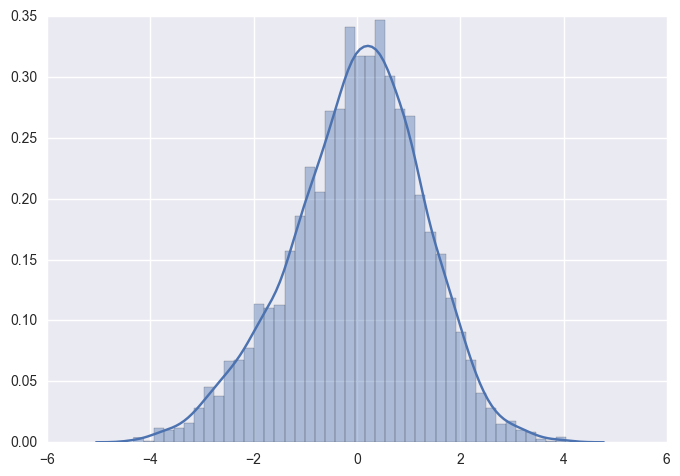

In [153]:
sns.distplot(cc.resid)

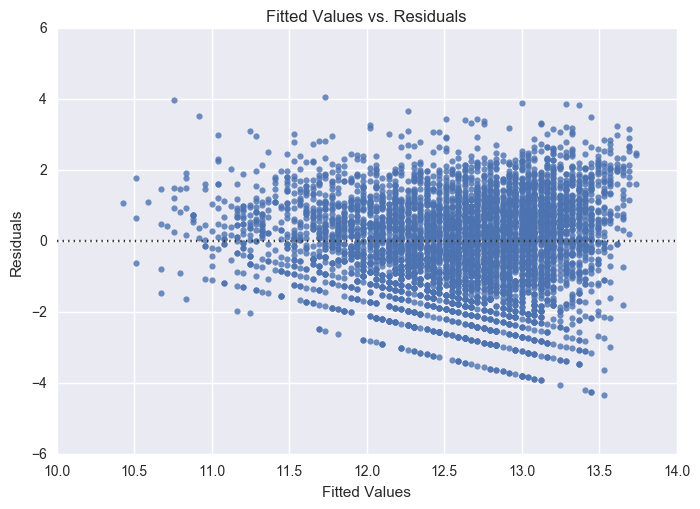

In [155]:
sns.residplot(x=cc.fittedvalues, y=cc.resid, data=cc)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals')

## Are the Number of Releases per year correlated with the global sales that year?

$H_{o}$ : There is no association between the number of game releases and global sales.

$H_{A}$ : There is an association between the number of game releases and global sales. 


Do the number of game releases really correlate with the total amount of global sales made that respected year. But do more games released means more money? In the figure shown below, where the number of releases and global sales are plotted over time, you can see that there is a steady strend until 2011, where it appears that the number of releases decreased significantly. Although the number of releases decreased, there is still money made from a fewer number of releases. The number of games released that particular year is used as the explanatory variable and the total global sales of that respected year is the response variable. An $\alpha$ of 0.05 is used as the significance level. A p-value of 5.9e-08 is found to be less than the significance level such that we reject the null hypothesis where there is no association between the two variables. The pearson r value of 0.89 indicates that there is a strong and positive correlation between the number of games released and the global sales. An adjusted R value of 0.784 shows that 78.4% of the number of games released per year can be used to explain the total global sales of that year. If the number of games released per year increased then the global sales will be increased at 0.5879 million dollars for that respected year, at 95% CI, the global sales can increase as low as 0.444 for one unit of games released and as high as 0.731 million dollars per year.  

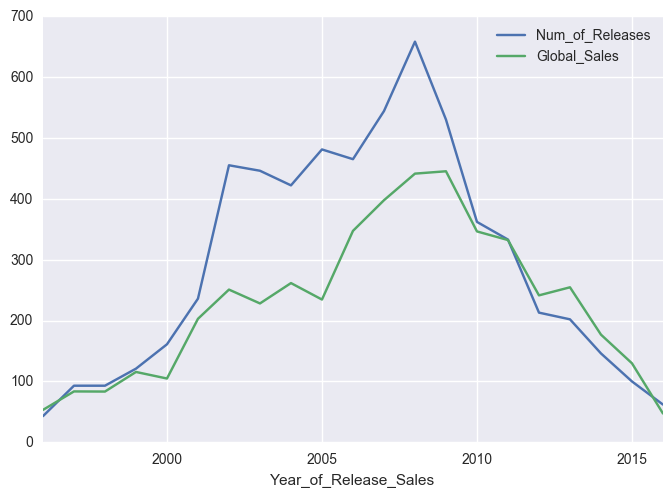

In [156]:
#are the number of releases correlated with sales?

release_count = df.groupby(['Year_of_Release_Sales'])['Global_Sales'].count().sort_values(ascending=False)
glob_sales = df.groupby(['Year_of_Release_Sales'])['Global_Sales'].sum()
real_sales = pd.concat([release_count, glob_sales],axis=1, keys=['Num_of_Releases','Global_Sales'])
real_sales.index = real_sales.index.astype(int)
real_sales.plot()

In [158]:
r_sales = ols(formula='Global_Sales ~ Num_of_Releases', data=real_sales)
res_sales = r_sales.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     73.51
Date:                Thu, 21 Dec 2017   Prob (F-statistic):           5.90e-08
Time:                        14:49:17   Log-Likelihood:                -113.93
No. Observations:                  21   AIC:                             231.9
Df Residuals:                      19   BIC:                             234.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          54.9076     23.756     

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-103.24690635,  -89.02899627,  -71.58045886,  -44.77601419,
          -43.99992567,  -41.48842936,  -26.9090602 ,  -26.2060746 ,
          -25.9860746 ,  -10.46840267,   -0.49233733,    9.23846421,
           16.08834338,   18.97013826,   22.86285551,   36.11309013,
           61.22109084,   78.61798792,   78.63401954,   80.93843401,
           81.49825628])),
 (58.225371894736121, 4.3553504849419878e-14, 0.983400375420868))

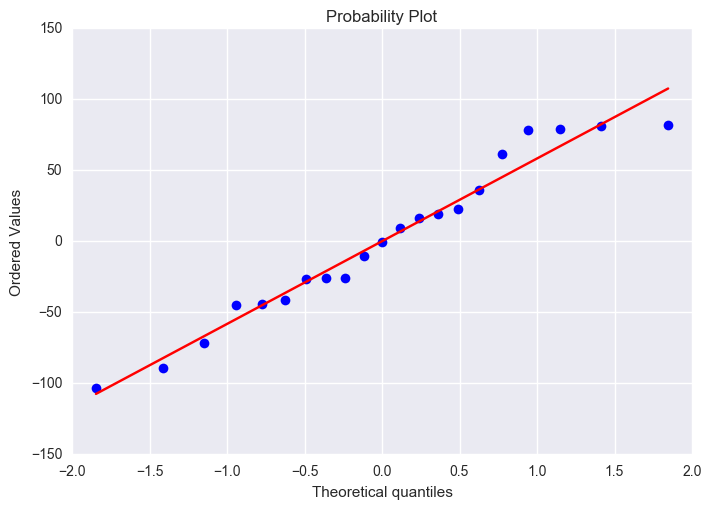

In [159]:
stats.probplot(res_sales.resid, plot=plt)

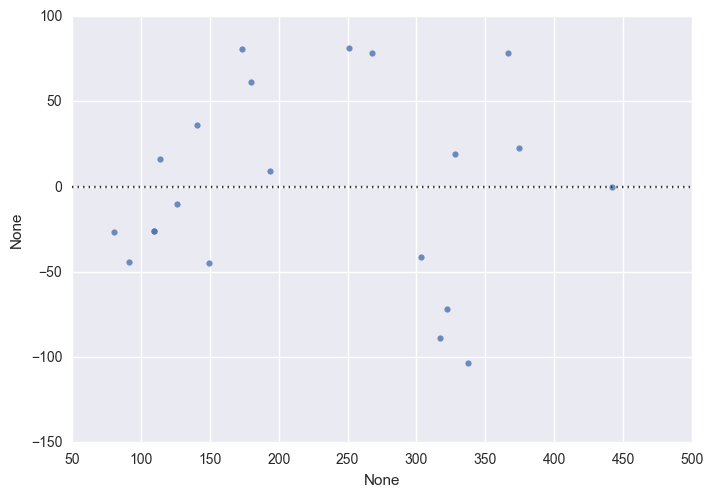

In [160]:
sns.residplot(x=res_sales.fittedvalues, y=res_sales.resid)